In [13]:
from shapely.geometry import *
from shapely.geometry import Polygon as sPoly
from shapely.geometry import Point as sPoint

from sympy import Segment

In [14]:
def insideSquare(x1,y1,x2,y2,q):
    if q[0]>x1 and q[0]<x2 and q[1]>y1 and q[1] <y2:
        return True;
    else:
        return False;

def SortByDistance(points,p,s):
    q1=points[0];
    q2=points[1];
    d1=sPoint(p).distance(sPoint(q1));
    d2=sPoint(p).distance(sPoint(q2));
    if d1>d2:
        return [[q2,q1],[s[1],s[0]]]
    else:
        return [[q1,q2],s]
    
def Get_Square(p,q):
    if p.x>q.x:
        x1=q.x;
        x2=p.x;
    else:
        x2=q.x;
        x1=p.x;
    if p.y>q.y:
        y1=q.y;
        y2=p.y;
    else:
        y2=q.y;
        y1=p.y;
    return x1,y1,x2,y2

In [15]:
def Seg_intersection(sside, segment):
    intersection=[];
    square_side=[];
    for j in range(4):
        seg_inter=sside[j].intersection(segment);
        if seg_inter!=[]:
            intersection.append((seg_inter[0].x, seg_inter[0].y));
            square_side.append(j);
    return intersection, square_side

#lowerleft and upperright points of square
def Inter_Points(x1,y1,x2,y2, polygon):
    spoints=[(x1,y1),(x1,y2),(x2,y2),(x2,y1)];
    sside=[0]*4
    smark=[0]*4
    sside[0]=Segment(spoints[0],spoints[1]);
    sside[1]=Segment(spoints[1],spoints[2]);
    sside[2]=Segment(spoints[2],spoints[3]);
    sside[3]=Segment(spoints[3],spoints[0]);
    intersections=[];
    points=polygon.exterior.coords;
    
    relation=-1;
    #loop in polygon
    for i in range(len(points)-1):
        p=points[i];
        q=points[i+1];
        segment=Segment(p,q);
        
        #check leftpoint
        if insideSquare(x1,y1,x2,y2,p):
            intersections.append(p);
        
        intersection, square_side=Seg_intersection(sside, segment);
        
        if len(intersection)==1:
            intersections.append(intersection[0])
        if len(intersection)>1:
            intersection,square_side=SortByDistance(intersection,p,square_side);
            for point in intersection:
                intersections.append(point);
            
        #loop in square
        if not insideSquare(x1,y1,x2,y2,q):
            if len(intersection)>0:
                sindex=square_side.pop();
                point=spoints[sindex];
                flag=0;
                if smark[sindex]==0 and polygon.contains(sPoint(point[0],point[1])):
                    intersections.append(point);
                    smark[sindex]=1;
                    flag=-1;
                
                sindex=sindex+1;
                if sindex==4:
                    sindex=0;
                point=spoints[sindex];
                if smark[sindex]==0 and polygon.contains(sPoint(point[0],point[1])):
                    intersections.append(point);
                    smark[sindex]=1;
                    flag=1;
                    
                if flag!=0:
                    for j in range(3):
                        sindex=sindex+flag;
                        if sindex==4:
                            sindex=0;
                        if sindex==-1:
                            sindex=3;
                        point=spoints[sindex];
                        if smark[sindex]==0 and polygon.contains(sPoint(point[0],point[1])):
                            intersections.append(point);
                            smark[sindex]=1;
                        else:
                            break;
            
            
    #whole square is inside the polygon
    if intersections==[]:
        for j in range(4):
            if polygon.contains(sPoint(spoints[j])):
                intersections.append(spoints[j])
                relation=0;#the square is inside the polygon
            else:
                relation=1;#the square intersect the polygon
    else:
        relation=2;#the square contains the whole polygon
            
    return intersections, relation

In [16]:
p1,p2,p3, p4,p5,p6, p7,p8,p9,p10,p11,p12=[(0.1,0.1),(4.9,0),(4.9,2.4), (7.5, 2.3), (7.6, 0), (11,0.1), (11.1, 5.1), (7.4, 5),(7.3, 2.5),(5, 3), (4.9, 5.2),(0, 5)]
a=sPoly([p1,p2,p3, p4,p5,p6, p7,p8,p9,p10,p11,p12])

def Cal_Fatness(poly):
    print
    points=poly.exterior.coords;
    
    slens=[0]*(len(points)-1)
    #loop in polygon
    for i in range(len(points)-1):
        p=points[i];
        q=points[i+1]
        segment=Segment(p,q);
        slens[i]=sPoint(p).distance(sPoint(q));
    slen=min(slens);
    
    area_ratio=[1]*(len(points)-1);
    fatness_list = []
    r_factor = 1
    if slen>0:
        for i in range(len(points)-1):
            length=0;
            r_factor = r_factor + 1
            while 1:
                length=length+slen;
                point=points[i]
                x1=point[0]-length;
                x2=point[0]+length;
                y1=point[1]-length;
                y2=point[1]+length;
                inter, relation=Inter_Points(x1,y1,x2,y2, poly);
                
                if sPoly(inter).area/poly.area>0.99:
                    break;
                area_ratio[i]=min(sPoly(inter).area/(x2-x1)/(y2-y1), area_ratio[i]);
                fatness_list.append(sPoly(inter).area/(x2-x1)/(y2-y1))

    print(fatness_list)            
    return min(area_ratio)
# Cal_Fatness(a)

In [17]:
import math

import graphics as gp

def draw_polygon_from_list(l):
    poly = gp.Polygon(l)
    poly.setOutline(gp.color_rgb(199,21,133))
    poly.setFill(gp.color_rgb(255,182,193))
    poly.draw(win)

def main():
    global win
    win = gp.GraphWin("Niceness of Polygon first prototype", 500, 500)
    win.setBackground(gp.color_rgb(255,255,255))

    poly_arr = []
        
    #draw an input polygon
    while True:
        i = win.checkKey()
        if i == "Return":
            print("enter key")
            break
        else:
            mouse = win.getMouse()
            poly_arr.append(mouse)
            mouse.setOutline(gp.color_rgb(0,0,0))
            c = gp.Circle(mouse, 2)
            c.setFill(gp.color_rgb(0,0,0))
            c.draw(win)

    poly = gp.Polygon(poly_arr)
    poly.setOutline(gp.color_rgb(0,0,0))
    poly.setWidth(2)
    poly.draw(win)

    #draw a rectangle
    rec_arr = []
    for i in range(0,2):
        mouse = win.getMouse()
        rec_arr.append(mouse)

    rec = gp.Rectangle(rec_arr[0],rec_arr[1])
    rec.setOutline(gp.color_rgb(128,128,128))
    rec.setWidth(2)
    rec.draw(win)

    #convert Point format
    points=[];
    for point in poly_arr:
        points.append((point.x,point.y));
    poly=sPoly(points)
    
    x1,y1,x2,y2=Get_Square(rec_arr[0],rec_arr[1])
    inter, relation=Inter_Points(x1,y1,x2,y2, poly)
    inter_points=[];
    for point in inter:
        inter_points.append(gp.Point(point[0],point[1]))

    #draw intersection area
    draw_polygon_from_list(inter_points)

#     fatness = Cal_Fatness(poly);
#     print(fatness);
    
    area = sPoly(inter).area/(x2-x1)/(y2-y1);
    area_str = "intersection area ratio: " + str(round(area,2))
#     + ", Fatness: " + str(round(fatness,2))
    txt = gp.Text(gp.Point(250,50), area_str)
    txt.setTextColor(gp.color_rgb(219,112,147))
    txt.setSize(15)
    txt.draw(win)

    if win.getKey()== "Return":
        win.close()


while 1:
    main();

enter key


GraphicsError: getMouse in closed window

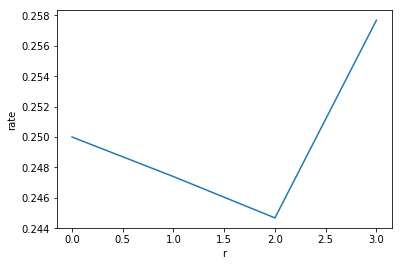

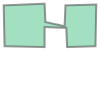

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

values =[0.24999999999999994, 0.24739582499780555, 0.24467595038783393, 0.257687661405906]
plt.plot(values)
plt.xlabel('r')
plt.ylabel('rate')
plt.show()
p1,p2,p3, p4,p5,p6, p7,p8,p9,p10,p11,p12=[(0.1,0.1),(4.9,0),(4.9,2.4), (7.5, 2.3), (7.6, 0), (11,0.1), (11.1, 5.1), (7.4, 5),(7.3, 2.5),(5, 3), (4.9, 5.2),(0, 5)]
a=sPoly([p1,p2,p3, p4,p5,p6, p7,p8,p9,p10,p11,p12])
a

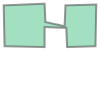

In [3]:
p1,p2,p3, p4,p5,p6, p7,p8,p9,p10,p11,p12=[(0.1,0.1),(4.9,0),(4.9,2.4), (7.5, 2.3), (7.6, 0), (11,0.1), (11.1, 5.1), (7.4, 5),(7.3, 2.5),(5, 3), (4.9, 5.2),(0, 5)]
a=sPoly([p1,p2,p3, p4,p5,p6, p7,p8,p9,p10,p11,p12])
a
